In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# final version will read from the database and use environment variables
df = pd.read_csv('insurance_claims.csv', na_values=['?'])
# remove one row (of 1,000) with negative umbrella policy limit
df = df[df['umbrella_limit'] >= 0]
df.dropna(axis=0, inplace=True)

In [2]:
# machine learning code here
# Using Decision Tree for Classification
# print(df.isna().sum())
y = df['fraud_reported']
X = df.drop(columns = ['fraud_reported'])

In [3]:
col_names = ['months_as_customer', 'age', 'policy_state', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'police_report_available', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'fraud_reported']
# load dataset
# dtdf = pd.read_csv('insurance_claims.csv', header=None, names=col_names)
# dtdf['policy_deductable']
data = df[col_names]
data.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,OH,1000,1406.91,0,466132,MALE,MD,craft-repair,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
2,134,29,OH,2000,1413.14,5000000,430632,FEMALE,PhD,sales,...,3,NO,2,3,NO,34650,7700,3850,23100,N
5,256,39,OH,1000,1351.10,0,478456,FEMALE,PhD,tech-support,...,3,NO,0,2,NO,64100,6410,6410,51280,Y
8,27,33,IL,500,1442.99,0,601734,FEMALE,PhD,other-service,...,1,NO,1,1,YES,27700,2770,2770,22160,N
11,447,61,OH,2000,1137.16,0,615561,FEMALE,High School,exec-managerial,...,3,YES,1,2,YES,114920,17680,17680,79560,N


In [4]:
data_binary_encoded = pd.get_dummies(data, columns=['insured_sex', 'insured_education_level', 'insured_occupation', 'police_report_available', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'property_damage', 'policy_state'])
data_binary_encoded.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,...,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,property_damage_NO,property_damage_YES,policy_state_IL,policy_state_IN,policy_state_OH
0,328,48,1000,1406.91,0,466132,53300,0,5,1,...,0,0,1,0,0,0,1,0,0,1
2,134,29,2000,1413.14,5000000,430632,35100,0,7,3,...,0,0,0,0,0,1,0,0,0,1
5,256,39,1000,1351.10,0,478456,0,0,19,3,...,0,0,1,0,0,1,0,0,0,1
8,27,33,500,1442.99,0,601734,0,0,21,1,...,0,0,0,0,1,1,0,1,0,0
11,447,61,2000,1137.16,0,615561,0,-51000,21,3,...,0,0,1,0,0,0,1,0,0,1


In [5]:
data_binary_encoded.drop(columns = ['police_report_available_NO', 'property_damage_NO'], inplace=True)
data_binary_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 992
Data columns (total 90 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   months_as_customer                      340 non-null    int64  
 1   age                                     340 non-null    int64  
 2   policy_deductable                       340 non-null    int64  
 3   policy_annual_premium                   340 non-null    float64
 4   umbrella_limit                          340 non-null    int64  
 5   insured_zip                             340 non-null    int64  
 6   capital-gains                           340 non-null    int64  
 7   capital-loss                            340 non-null    int64  
 8   incident_hour_of_the_day                340 non-null    int64  
 9   number_of_vehicles_involved             340 non-null    int64  
 10  bodily_injuries                         340 non-null    int64 

In [6]:
# split dataset in features and target variable
y = data_binary_encoded['fraud_reported']
X = data_binary_encoded.drop(columns=['fraud_reported'])

In [7]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [8]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [9]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test,y_pred))

Accuracy: 0.7352941176470589
              precision    recall  f1-score   support

           N       0.87      0.77      0.82        78
           Y       0.45      0.62      0.53        24

    accuracy                           0.74       102
   macro avg       0.66      0.70      0.67       102
weighted avg       0.77      0.74      0.75       102



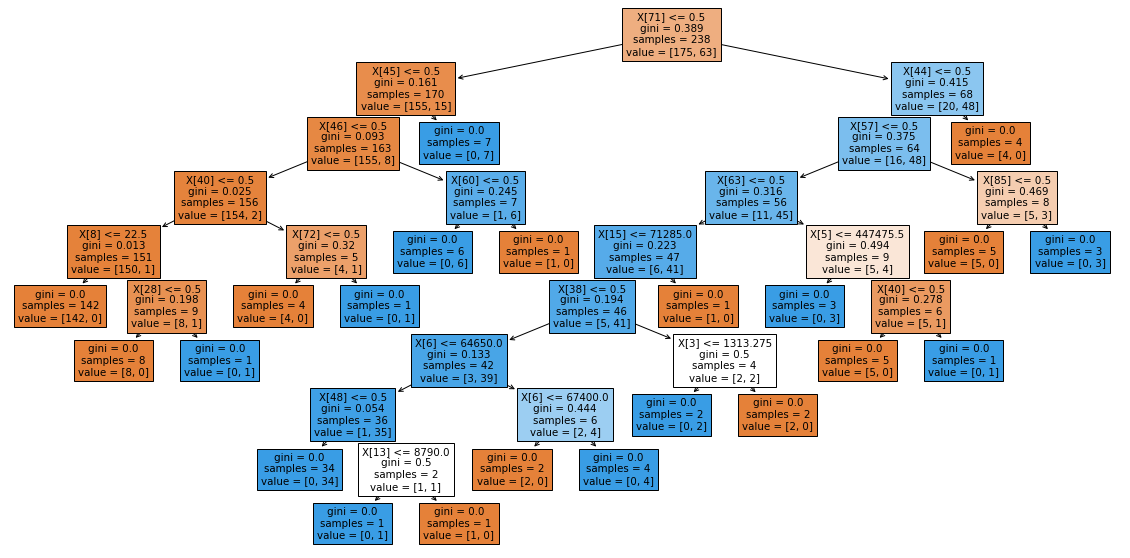

In [10]:
model_all_params = clf
# Prepare a plot figure with set size.
plt.figure(figsize = (20,10))
# Plot the decision tree, showing the decisive values and the improvements in Gini impurity along the way.
tree.plot_tree(model_all_params, 
          filled=True      )
# Display the tree plot figure.
plt.show()

In [11]:
# ML code above here

In [ ]:
total_count = df.shape[0]
fraud_count = df[(df['fraud_reported'] == 'Y')].shape[0]
umbrella_count = df[(df['umbrella_limit'] > 0)].shape[0]
fraudumbrella_count = df[(df['fraud_reported'] == 'Y') & (df['umbrella_limit'] > 0)].shape[0]
fraudnonumbrella_count = df[(df['fraud_reported'] == 'Y') & (df['umbrella_limit'] == 0)].shape[0]
print(f'fraud % of total: {100*fraud_count / total_count}') 
print(f'umbrella % of total: {100*umbrella_count / total_count}')
print(f'fraud % of umbrella: {100*fraudumbrella_count / umbrella_count}')
print(f'fraud % of non-umbrella: {100*fraudnonumbrella_count / (total_count - umbrella_count)}')

In [ ]:
# The following values were very evenly distributed, e.g., three states about 1/3 each:
# umbrella_limit = fraudumbrella['umbrella_limit'].value_counts()
# state = X['policy_state'].value_counts()
# csl = X['policy_csl'].value_counts()
# deductable = X['policy_deductable'].value_counts()